# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #импортируем пандас и библиотеки графиков

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info() #смотрим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.head(10) #смотрим на первые 10 строк data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
#df = df.rename(columns={'ponds_around3000':'ponds_around3000'})

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

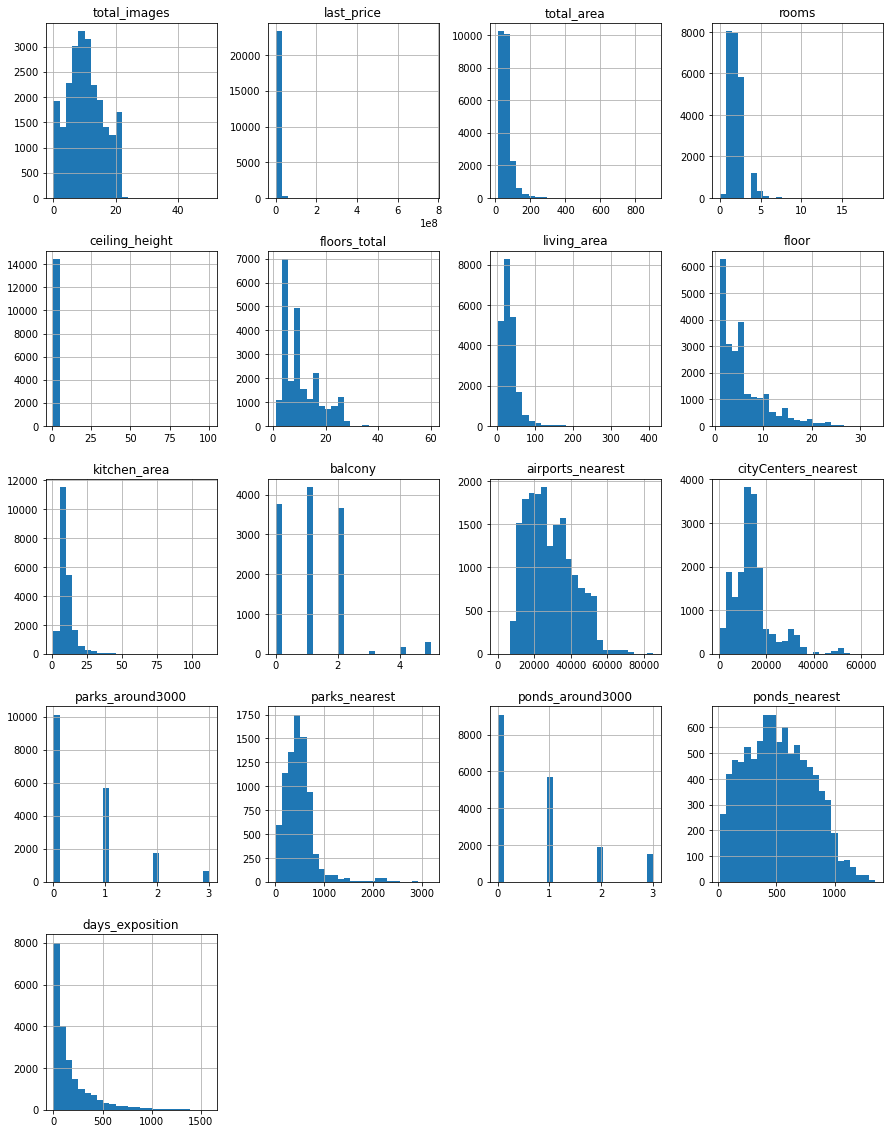

In [5]:
df.hist(column=['total_images', 'last_price', 'total_area', 
                'rooms', 'ceiling_height', 'floors_total', 
                'living_area', 'floor', 'kitchen_area', 
                'balcony', 'airports_nearest', 'cityCenters_nearest', 
                'parks_around3000', 'parks_nearest', 'ponds_around3000', 
                'ponds_nearest', 'days_exposition'], figsize=(15, 20), bins=25) 

По полученным гистограммам трудно определить какое распределние имеет каждый тип данных, есть ли выбросы в них. Для этого необходимо будет выполнить предобработку данных и изучить кажду гистограмму отдельно, изменяя диапазон, количество корзин и другие параметры.

### Выполните предобработку данных

In [6]:
df.isna().sum() #сумма пропущенных значений в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
df['balcony'] = df['balcony'].fillna(0) #заполним пропуски в столбце с количеством балконов значением "0"

*После анализа количества пропусков в датасете мы видим, что:*
- наибольшее число из них находится в категории данных, полученных автоматически - до двух третих от общего числа, заполнение таких пропусков исказит данные;
- большое количество пропусков было обнаружено в столбце balcony - отсутсвие данных заполним нулями, так как скорее всего балконов нет в данных квартирах;
- так же обнаружены пропуски в категориях, с геометрическими параметрами квартир/домов - площади, высота потолков, количество этажей. Их не заполнили сами пользователи, точно выявить эти данные мы не можем - пропуски оставляем;
- странным является наличие пропусков в стобцах locality_name и days_exposition - возможно ошибка при выгрузке данных, их тоже не заполняем.

In [8]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [9]:
df['floors_total'] = df['floors_total'].fillna(0) # заполним пропуски Nan
df['floors_total'].unique() # проверим заменились ли значения Nan

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15.,  0., 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [10]:
df['floors_total'] = df['floors_total'].astype('int', errors='ignore')
df['is_apartment'] = df['is_apartment'].astype('bool', errors='ignore')
df.info() # проверим все преобразования

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Мы заменили тип данных в столбцах с датой размещения объявления, чтобы иметь возможность работать с датой, если бы нам, например, нужно было бы поменять часовой пояс. Общее количество этажей мы преобразовали в целочисленный вид из дробного, а параментр is_apartment - в булев тип, также для удобства работы. 

In [11]:
df.duplicated().sum() # проверим датафрейм на явные дубликаты

0

In [12]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [13]:
df['locality_name'].nunique()

364

In [14]:
df['locality_name'] = df['locality_name'].replace({'городской поселок Янино-1': 'городской посёлок Янино-1', 
                             'поселок Рябово': 'поселок городского типа Рябово',  #заменяем неявные дубликаты
                            'поселок Аннино':'посёлок Аннино',  # просматривая df вручную
                            'поселок Мурино': 'посёлок Мурино', 
                            'посёлок городского типа Рябово': 'поселок городского типа Рябово'}) 

In [15]:
df['locality_name'].nunique() # проверяем насколько уменьшилось число уникальных значений 'посёлок при железнодорожной станции': 'посёлок станции'

359

In [74]:
ids = {'поселок': 'посёлок',
       'посёлок при железнодорожной станции': 'посёлок станции',
       'городской посёлок': 'посёлок городского типа',
      'садоводческое некоммерческое товарищество': 'садовое товарищество'}

for old, new in ids.items():
    df['locality_name'] = df['locality_name'].str.replace(old, new, regex=False)

In [75]:
df['locality_name'].nunique()

320

In [76]:
list(df['locality_name'].sort_values(ascending=False).unique()) #используем сортировку для выявления других дубликатов

['село Шум',
 'село Старая Ладога',
 'село Русско-Высоцкое',
 'село Рождествено',
 'село Путилово',
 'село Паша',
 'село Павлово',
 'село Никольское',
 'село Копорье',
 'садовое товарищество Садко',
 'садовое товарищество Рахья',
 'садовое товарищество Приладожский',
 'садовое товарищество Новая Ропша',
 'садовое товарищество Лесная Поляна',
 'посёлок станции Свирь',
 'посёлок станции Приветнинское',
 'посёлок станции Лужайка',
 'посёлок станции Корнево',
 'посёлок станции Громово',
 'посёлок станции Вещево',
 'посёлок городского типа имени Свердлова',
 'посёлок городского типа имени Морозова',
 'посёлок городского типа Янино-1',
 'посёлок городского типа Фёдоровское',
 'посёлок городского типа Форносово',
 'посёлок городского типа Ульяновка',
 'посёлок городского типа Токсово',
 'посёлок городского типа Тайцы',
 'посёлок городского типа Советский',
 'посёлок городского типа Синявино',
 'посёлок городского типа Сиверский',
 'посёлок городского типа Свирьстрой',
 'посёлок городского тип

### Добавьте в таблицу новые столбцы

In [19]:
df['square_meter_price'] = round(df['last_price'] / df['total_area'], 2) # цена одного квадратного метра, 
df['square_meter_price'].head() # округленная до 2-х знаков после запятой

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: square_meter_price, dtype: float64

In [20]:
df['weekday_exp'] = df['first_day_exposition'].dt.weekday # день недели публикации объявления 
df['weekday_exp'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday_exp, dtype: int64

*Дни недели:*
* 0 - понедельник
* 1 - вторник
* 2 - среда
* 3 - четверг
* 4 - пятница
* 5 - суббота
* 6 - воскресенье

In [21]:
df['month_exp'] = df['first_day_exposition'].dt.month
df['month_exp'].head() # месяц публикации объявления

0     3
1    12
2     8
3     7
4     6
Name: month_exp, dtype: int64

In [22]:
df['year_exp'] = df['first_day_exposition'].dt.year # год публикации объявления
df['year_exp'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exp, dtype: int64

In [23]:
def type_floor(total, floor): # создаём функцию для двух аргументов - всего этажей и этаж
    try:
        if total != floor: # прописываем логические условия 
            if floor == 1:
                return 'первый'
            else:
                return 'другой'
        else:
            return 'последний'
        
    except:
        return 'нет этажа'

In [24]:
df['type_of_floor'] = df.apply(lambda row: type_floor(row['floors_total'], row['floor']), axis=1) #применяем функцию к 2 стобцам
df['type_of_floor'].head(10) # тип этажа квартиры (значения — «первый», «последний», «другой»)

0    другой
1    первый
2    другой
3    другой
4    другой
5    другой
6    другой
7    другой
8    другой
9    другой
Name: type_of_floor, dtype: object

In [25]:
df['cityCenters'] = round(df['cityCenters_nearest'] / 1000)
df['cityCenters'].head() #расстояние до центра города в километрах (переведите из м в км, округлите до ближайших целых значений)

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenters, dtype: float64

### Проведите исследовательский анализ данных

**4.1 Изучение параметров**

In [26]:
df.describe().T #выведем основные характиристики датасета в транспонированном виде

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.00,6.00,9.00,14.000,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.00,3400000.00,4650000.00,6800000.000,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.00,40.00,52.00,69.900,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.00,1.00,2.00,3.000,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.00,2.52,2.65,2.800,100.0
floors_total,23699.0,1.063509e+01,6.616396e+00,0.00,5.00,9.00,16.000,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.00,18.60,30.00,42.300,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.00,2.00,4.00,8.000,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.30,7.00,9.10,12.000,112.0
balcony,23699.0,5.910798e-01,9.592982e-01,0.00,0.00,0.00,1.000,5.0


<AxesSubplot:>

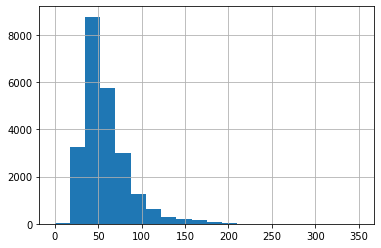

In [27]:
df.query('total_area < 200')['total_area'].hist(bins=20, range=(0,350)) # общая площадь, без учета квартир > 200 м2

In [28]:
df.query('total_area < 200')['total_area'].count() # выборка в срезе уменьшилась примерно на 200 квартир

23468

In [29]:
df.query('total_area < 200')['total_area'].count() / df['total_area'].count() #выборка уменьшилась на 1%,
                                                                              #это не сильно повлияло на результат

0.9902527532807291

In [77]:
df = df.query('total_area < 200') # перезапишем датафрейм без учета аномалии

In [79]:
df.query('total_area > 200')['total_area'].count() # проверим перезапись

0

<AxesSubplot:>

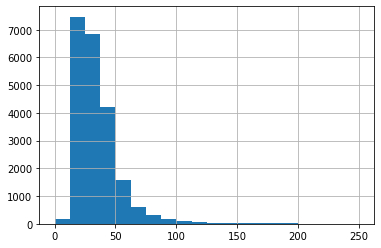

In [30]:
df['living_area'].hist(bins=20, range=(0,250)) # жилая площадь

Минимальной жилой площадью на 1 человека считается 6 м2.

In [31]:
df.query('living_area < 6')['living_area'].count() # посчитаем, сколько квартир не подходят под это требованиетакие

6

6 квартир не удовлетворяют требованию.  Такие данные не повлияют на график, оставим график, но перезапишем датафрейм.

In [80]:
df = df.query('living_area > 6')

<AxesSubplot:>

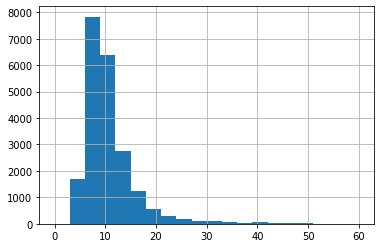

In [32]:
df['kitchen_area'].hist(bins=20, range=(0,60)) # площадь кухни

По графику видно, что кухонь площадью больше 30 метров не так много, посчитаем сколько точно.

In [33]:
df.query('kitchen_area > 30')['kitchen_area'].count()

323

In [34]:
df.query('kitchen_area > 30')['kitchen_area'].count() / df['kitchen_area'].count()  #выборка уменьшилась на 1,5%,
                                                                                    #это не сильно повлияло на результат

0.015078661126931516

<AxesSubplot:>

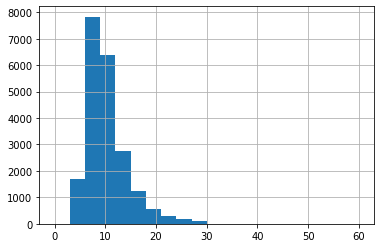

In [35]:
df.query('kitchen_area < 30')['kitchen_area'].hist(bins=20, range=(0,60)) # построим график без больших кухонь

In [83]:
df = df.query('kitchen_area < 30') # перезапишем датафрейм, убрав большие кухни

<AxesSubplot:>

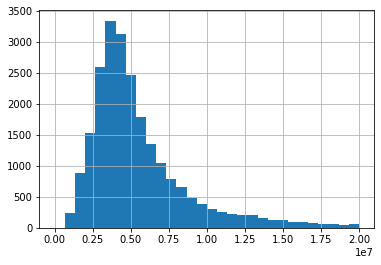

In [36]:
df.query('last_price > 1e6')['last_price'].hist(bins=30, range=(0,2e7)) # цена объекта, без учета квартир дешевле миллиона

In [37]:
df.query('last_price > 1e6')['last_price'].count() / df['last_price'].count() #выборка уменьшилась на 1%,
                                                                              #это не сильно повлияло на результат

0.9896620110553188

In [84]:
df = df.query('last_price > 1e6') # перезапишем датафрейм, убрав квартиры дешевле миллиона

<AxesSubplot:>

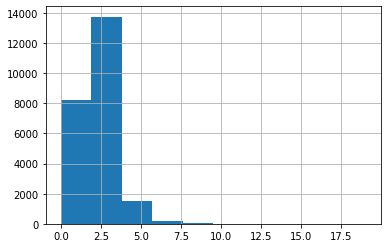

In [38]:
df['rooms'].hist() # количество комнат

In [39]:
df.groupby('rooms')['rooms'].count() # выведем количество квартир по каждому количеству комнат

rooms
0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

<AxesSubplot:>

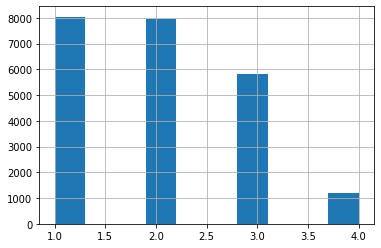

In [40]:
df.query('0 < rooms < 5')['rooms'].hist() # построим гистограмму без квартир с 0 комнат и менее 5

In [41]:
df.query('0 < rooms < 5')['rooms'].count() / df['rooms'].count() #выборка уменьшилась на 3%,
                                                                 #это не сильно повлияет на результат

0.9697033630110975

In [85]:
df = df.query('0 < rooms < 5') # перезапишем датафрейм, убрав квартиры с большим количеством комнат

<AxesSubplot:>

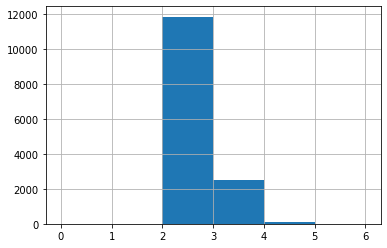

In [42]:
df['ceiling_height'].hist(bins=6, range=(0,6)) # высота потолков

In [43]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [44]:
df['ceiling_height'] = df['ceiling_height'].replace({27.:2.7, 24.:2.4, 25.:2.5, 32.:3.2, 26.:2.6, 100.:10.0, 27.5:2.75}) 
df['ceiling_height'].sort_values().unique() # заменим неверные значения и просмотрим уникальные

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.3 ,  2.34,  2.4 ,
        2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,
        2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,
        2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,
        2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,
        2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,
        2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,
        2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,
        3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,
        3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,
        3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,
        3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,
        3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,
        3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,
        3.66,  3.67,

Посмотрим насколько сильно изменятся данные, если убрать значения потолков меньше 2.4 метров и выше 8.

In [45]:
df.query('2.4 < ceiling_height < 9')['ceiling_height'].count()

14454

Данные сократились почти на треть. Оставим датафрейм в прежнем виде.

<AxesSubplot:>

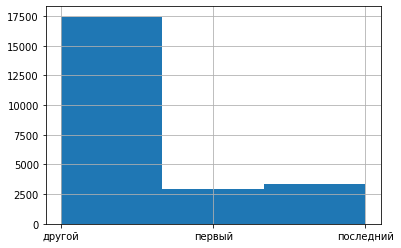

In [46]:
df['type_of_floor'].hist(bins=3) # тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:>

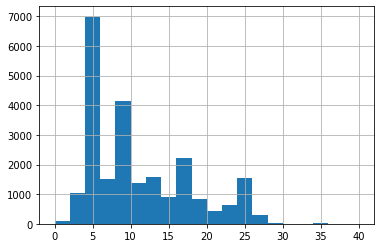

In [47]:
df['floors_total'].hist(bins=20, range=(0,40)) # общее количество этажей в доме

In [48]:
df['floors_total'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36,
       37, 52, 60])

In [49]:
df.groupby('floors_total')['floors_total'].count() # количество квартир по этажам в доме

floors_total
0       86
1       25
2      383
3      668
4     1200
5     5788
6      914
7      592
8      390
9     3761
10    1174
11     203
12    1362
13     229
14     553
15     365
16    1376
17     833
18     505
19     339
20     271
21     158
22     286
23     352
24     469
25    1075
26     124
27     164
28      21
29       1
33       1
34       1
35      24
36       3
37       1
52       1
60       1
Name: floors_total, dtype: int64

<AxesSubplot:>

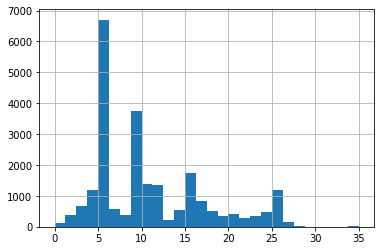

In [50]:
df['floors_total'].hist(bins=28, range=(0,35))

На графике виден незначительный всплекс значений в районе 35 этажей. Возможно это выброс.

In [86]:
df = df.query('0 < floors_total < 28') # уберем из датафрейма дома с 0 этажей и выше 27 этажей  

<AxesSubplot:>

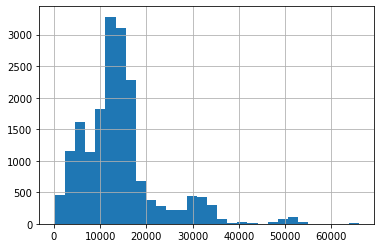

In [51]:
df['cityCenters_nearest'].hist(bins=30) # расстояние до центра города в метрах

<AxesSubplot:>

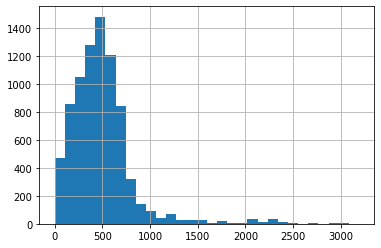

In [52]:
df['parks_nearest'].hist(bins=30) # расстояние до ближайшего парка

*Наблюдения по параметрам:*
- в данных с общей площадью квартир исключили из гистограммы квартиры более 200 метров квадратных;
- 6 квартир имеют жилую площадь менее 6 метров квадратных, что не подходит по стандартам, возможно это ошибочные данные, их мы не стали удалять при построении гистограммы, так они слабо влияют на выборку;
- также было обнаружено более 300 квартир с кухнями площадью более 30 метров, при построении гистограммы мы их не учитывали;
- гистограмма по стоимости жилья была построена без квартир, цена которых менее миллиона рублей;
- 197 квартир имеют 0 комнат, что странно, эти данные не были использованы при построении гистограммы, как и квартиры с количеством комнат более 4-х (их количество чуть более 500);
- по построенной гистограмме видно, что большинство значений высоты потолков располагается в диапазоне между 2 и 3 метрами;
- гистограмма построенная по новому столбцу type_of_floor показала, что большинство квартир ожидаемо находятся не на первом и не на последнем этажах;
- данные о растоянии до центра и ближайшего парка трудно оценить на достоверность, так как некоторые квартиры находились в области, и высокие значения в таком случае оправданы. Значений 0 метров так же не было выявлено.

**4.2 Изучение скорости продажи квартир**

In [53]:
df['days_exposition'].isna().sum() # найдем количество пропусков в столбце со временем продажи квартир

3181

<AxesSubplot:>

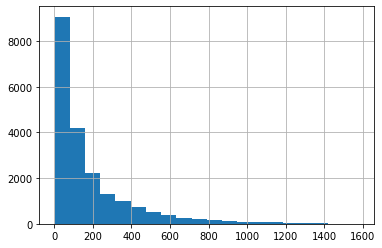

In [54]:
df['days_exposition'].hist(bins=20)

In [55]:
df['days_exposition'].describe() #выведем общее описание по столбцу, включающее среднее значение и медиану

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Из полученных данных видно, что стандартное отклонение имеет слишком большое значение, это может говорить о наличие большого количества выбросов.

<AxesSubplot:>

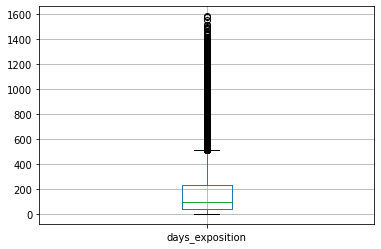

In [56]:
df.boxplot(column='days_exposition') # построим диаграмму размаха

Из диаграммы видно, что большое количество значений находится выше "второго уса", т.е. являются выбросами и имеют значения больше чем Q3+1,5IQR (512,5). Построим гистограмму без них.

<AxesSubplot:>

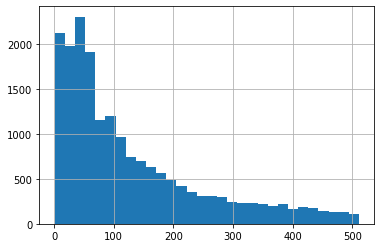

In [57]:
df.query('days_exposition < 512')['days_exposition'].hist(bins=30)

In [58]:
df.query('days_exposition > 512')['days_exposition'].count()

1669

In [59]:
df.query('days_exposition < 512')['days_exposition'].describe()

count    18844.000000
mean       128.652197
std        121.386843
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        511.000000
Name: days_exposition, dtype: float64

*По полученным данным можно отметить, что:*
- большинство квартир продается в течение 75-100 дней;
- Средним временем продажи является срок в 85 дней;
- Необычно быстрым является показатель в 1 день;
- Самым долгим оказалось значение в 1580 дней.

**4.3 Определение факторов, наиболее влияющих на общую стоимость**

<AxesSubplot:>

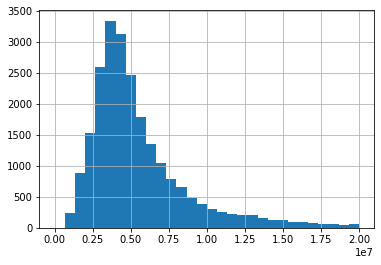

In [60]:
df.query('last_price > 1e6')['last_price'].hist(bins=30, range=(0,2e7)) 

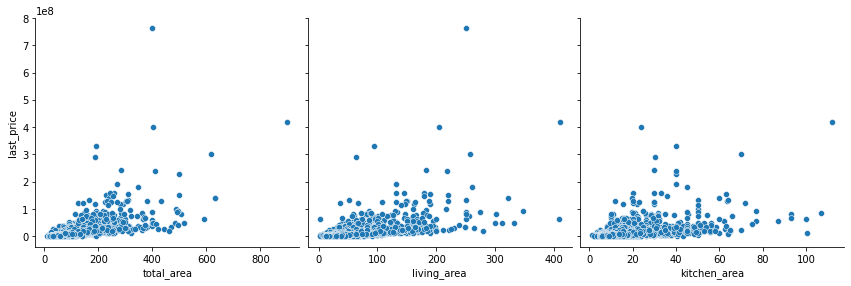

In [61]:
sns.pairplot(df, x_vars=['total_area', 'living_area', 'kitchen_area'], y_vars='last_price', height=4) 
# построим диаграммы рассеивания методом pairplot, без фильтрации значений

На полученных диаграммах заметны выбросы значений (например общая площадь более 800 м2. Создадим новый датасет без таких значений.

In [62]:
data = df.loc[(df['total_area'] < 600) & (df['living_area'] < 350) & (df['kitchen_area'] < 100) & (df['last_price'] < 4.5e8)]
# создадим новый датасет, с условиями по будущим параметрам x на графике

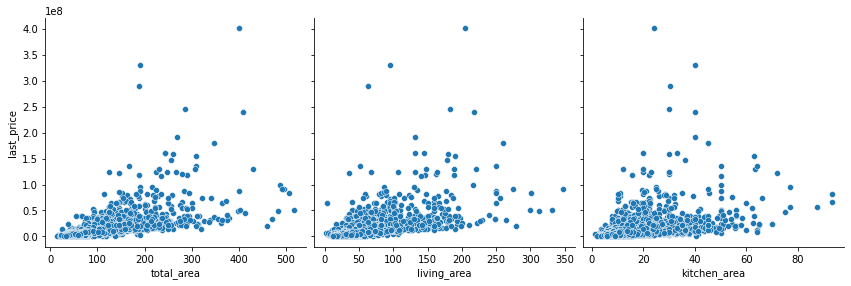

In [63]:
sns.pairplot(data, x_vars=['total_area', 'living_area', 'kitchen_area'], y_vars='last_price', height=4)
# построим диаграмму рассеивания для зависимости цены от площадей: общей, кухни и жилой

In [64]:
data[['living_area', 'total_area', 'kitchen_area', 'last_price']].corr().iloc[[3]] #выведем коэффициент Пирсона в одной таблице

,living_area,total_area,kitchen_area,last_price
last_price,0.59626,0.673071,0.50648,1.0


Коэффициент Пирсона 0,67 говорит о наличие связи между площадью квартиры и её ценой (с увеличением площади растет цена), но в то же время его величина не позволяет сказать что цена зависит только от этого.

Ситуация с жилой площадью напоминает зависимость цены от общей площади, но в данном случае коэффициент Пирсона имеет ещё меньшее значение, а значит зависимость цены от жилой площади меньше чем зависмость от общей.

Зависимость цены квартиры от площади кухни наблюдается меньше, чем от общей или жилой площади, но её так же можно проследить по диаграмме и коэффициенту Пирсона.

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

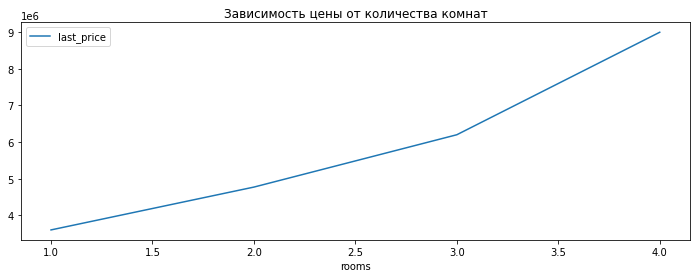

In [65]:
(
    df.query('0 < rooms < 5')
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от количества комнат', figsize=(12,4))
) # зависимость медианной цены от количества комнат из среза менее 

In [66]:
df['last_price'].corr(df['rooms'])

0.3633428499648948

Коэффициент корреляции 0,36 говорит о слабой зависимости между ценой квартиры и количеством комнат. Более явное влияние тут оказывает площадь.

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, xlabel='type_of_floor'>

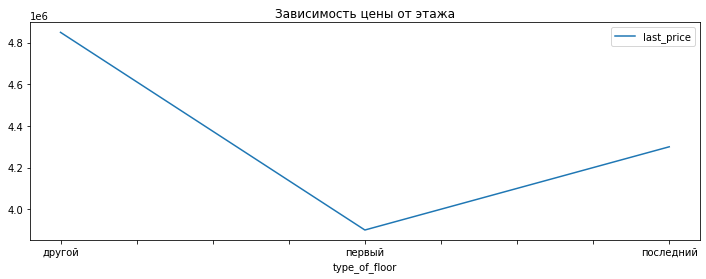

In [67]:
(
    df.pivot_table(index='type_of_floor', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от этажа', figsize=(12,4))
) # зависимость медианной цены от этажа квартиры

На полученном графике виден рост цены по категориям в порядке "первый-последний-другой", что может говорить о непопулярности квартир на первом и последнем этажах и соответсвующей зависимости в цене. 

In [68]:
df['last_price'].corr(df['weekday_exp']) #найдём последовательно коэффициенты корреляции для зависимости цены от дня недели

0.0015501452176215407

In [69]:
df['last_price'].corr(df['month_exp']) # ...месяца

0.0027791287507397166

In [70]:
df['last_price'].corr(df['year_exp']) # ... и года

-0.043089036199508615

По полученным данным мы можем сказать, что нет зависимости между ценой и датой публикации объявления.

**4.4 Расчёт цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [71]:

locality_top = df.groupby('locality_name')['square_meter_price'].agg(['count', 'mean']).sort_values(by='count', ascending=False)
round(locality_top.head(10), 2)

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.01
посёлок Мурино,556,85681.76
посёлок Шушары,440,78677.36
Всеволожск,398,68654.47
Пушкин,369,103125.82
Колпино,338,75424.58
посёлок Парголово,327,90175.91
Гатчина,307,68746.15
деревня Кудрово,299,92473.55


Самая высокая цена квадратного метра наблюдается в Санкт-Петергбурге, и поселках Мурино и Шушары (114, 85 и 76 тысяц за метр квадратный). Самая низкая цена из популярных населенных пунктов в Выборге и деревне Кудрово (58 и 92 тысячи).

**4.5 Расчёт цены квартир в Санкт-Петербурге на разном удалении от центра**

In [72]:
center_price = df.query('locality_name=="Санкт-Петербург"').groupby('cityCenters')['last_price'].mean()
center_price.head(10) # сделаем сводную таблицу, подготовив срез по городу, сгруппировав по дистанции, и посчитав среднюю цену

cityCenters
0.0    3.144912e+07
1.0    2.120672e+07
2.0    1.778832e+07
3.0    1.112658e+07
4.0    1.330428e+07
5.0    1.449912e+07
6.0    1.533842e+07
7.0    1.477515e+07
8.0    9.957717e+06
9.0    6.950659e+06
Name: last_price, dtype: float64

<AxesSubplot:xlabel='cityCenters'>

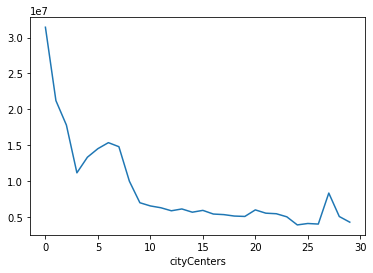

In [73]:
center_price.plot() # построим просто график по полученной таблице

По графику можно отследить, как цена квартир снижается по мере удаления от центра. Также наблюдаются несколько пиков повышения цены. Они могут быть связаны с другими факторами, такими как большая площадь, хороший этаж или нечто иное.

### Напишите общий вывод

### Общие выводы
**В процессе исследования датафрейма было установлено:**
- что наибольшее количество пропусков в данных находится среди числовых значений, полученных автоматическим путем (возможные ошибки при выгрузке или в системе). Также значительное количество пропусков встречается среди  геометрических параметров квартир (площади отдельных помещений, высоты потолков), их, вероятнее всего не заполнили сами пользователи, так как не знали или не помнили точные данные. Странным кажется наличие пропусков в столбце с названием населенного пункта и временем размещения объявления, возможной причиной также может быть ошибка выгрузки;
- при построении гистограмм по параметрам датафрейма были исключены выбросы значений, такие как квартиры площадью более 200 м2, маленькая жилая площадь (< 6м2), большие площади кухонь, слишком высокие (> 8 м) и слишком низкие потолки (< 2,4 м), дома выше 28 этажей и со значением 0;
- при определении времени, необходимого на продажу квартиры, также было обнаружено большое количество выбросов, которые были исключены при построении гистограммы и оценке среднего времени. Исследование показало что средний срок продажи квартир находится в диапазоне 75-100 дней и составляет 85 дней. Рекордно быстрым является показатель продажи за 1 день, рекордно долгим - 1580 дней;
- при исследовании факторов, влияющих на стоимость жилья, было установлено, что наибольшее влияние оказывает общая площадь квартиры, этаж расположения. Количество комнат и отдельные площади помещений влияют в меньше степени на цену квартиры, дата публикации объявление вовсе не влияет;
- самая высокая цена квадратного метра среди населенных пунктов с наибольшим количеством объявлений обнаружена в Санкт-Петергбурге, и поселках Мурино и Шушары (114, 85 и 76 тысяц за метр квадратный), самая низкая цена из той же категории - Выборг и деревня Кудрово (58 и 92 тысячи);
- на последнем этапе исследования было установлено, что цена за квадратный метр в Санкт-Петербурге уменьшается по мере удаления квартиры от центра. На приведенном графике были отмечены несколько пиков роста цены, вероятно связанных с другими факторами, влияющими на цену (такими как площадь).

Подводя общий итог, можно выделить факторы, оказывающие влияние на стоимость жилья - это общая площадь, этаж, расположение квартиры. Средний срок продажи квартиры при эторм составляет 3 месяца. 